In [2]:
#We're making linear regressions

In [3]:
import pandas as pd

### Importation

In [4]:
#In stores, transactions, and test, Data flows, a treasure chest. Pandas module, a trusted guide, Unveiling insights, side by side. From cities to families, it reveals, A world of data, where knowledge conceals.
stores = pd.read_csv('stores.csv')
transactions = pd.read_csv('transactions.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### DataFrame Manufacture

In [5]:
stores.drop(columns=['city', 'state', 'cluster', 'type'], inplace = True)
merged_df = pd.merge(stores, transactions, on='store_nbr')

In [6]:
family_df = pd.merge(merged_df, train, on=['date','store_nbr'])
family_df.drop(columns=['onpromotion',], inplace = True)

In [7]:
family_df['date'] = pd.to_datetime(family_df['date'])


In [8]:
dfs = family_df.groupby(['family', 'store_nbr'])
dfs = {key: group.set_index('date') for key, group in dfs}


In [9]:
dfs[('AUTOMOTIVE', 1)]

,store_nbr,transactions,id,family,sales
date,,,,,
2013-01-02,1,2111,1782,AUTOMOTIVE,2.0
2013-01-03,1,1833,3564,AUTOMOTIVE,3.0
2013-01-04,1,1863,5346,AUTOMOTIVE,3.0
2013-01-05,1,1509,7128,AUTOMOTIVE,5.0
2013-01-06,1,520,8910,AUTOMOTIVE,2.0
...,...,...,...,...,...
2017-08-11,1,570,2991978,AUTOMOTIVE,1.0
2017-08-12,1,1004,2993760,AUTOMOTIVE,6.0
2017-08-13,1,416,2995542,AUTOMOTIVE,1.0


### Linear Regression Test

In [10]:
sales_data = dfs[('AUTOMOTIVE', 1)]['sales']
butt_town = sales_data.index.values
butt_town.reshape(-1,1)
sales_data.values

array([2., 3., 3., ..., 1., 1., 4.])

In [11]:
list(dfs[('AUTOMOTIVE', 1)].index)[-1]

Timestamp('2017-08-15 00:00:00')

In [12]:
print(test['date'].min())
print(test['date'].max())

2017-08-16
2017-08-31


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
# Get the sales data for ('AUTOMOTIVE', 1)
sales_data = dfs[('AUTOMOTIVE', 1)]['sales']



# Prepare the features and target variables
X = sales_data.index.values.reshape(-1, 1)
y = sales_data.values



### Encode the date index as a numerical feature
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)
###

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_encoded, y)

predicted_sales = model.predict(X_encoded)

print(model.coef_)
print(model.intercept_)

[0.00160718]
1.9159191532783142


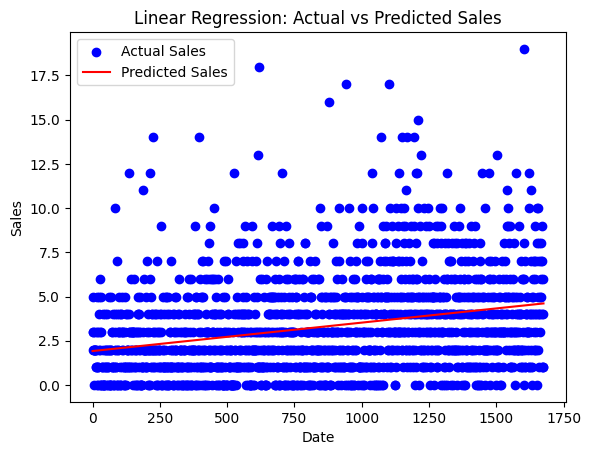

In [14]:
import matplotlib.pyplot as plt

# Plot the actual sales data
plt.scatter(X_encoded, y, color='blue', label='Actual Sales')

# Plot the predicted sales data
plt.plot(X_encoded, predicted_sales, color='red', label='Predicted Sales')

# Set the labels and title
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Linear Regression: Actual vs Predicted Sales')

# Add a legend
plt.legend()

# Show the plot
plt.show()


### Test Linear Prediction

In [15]:
X_encoded.max()

1675.0

In [16]:
test_data = test['date'].unique()
test_data

array(['2017-08-16', '2017-08-17', '2017-08-18', '2017-08-19',
       '2017-08-20', '2017-08-21', '2017-08-22', '2017-08-23',
       '2017-08-24', '2017-08-25', '2017-08-26', '2017-08-27',
       '2017-08-28', '2017-08-29', '2017-08-30', '2017-08-31'],
      dtype=object)

In [17]:
test['date'].unique()

array(['2017-08-16', '2017-08-17', '2017-08-18', '2017-08-19',
       '2017-08-20', '2017-08-21', '2017-08-22', '2017-08-23',
       '2017-08-24', '2017-08-25', '2017-08-26', '2017-08-27',
       '2017-08-28', '2017-08-29', '2017-08-30', '2017-08-31'],
      dtype=object)

In [18]:
import numpy as np

test_data = test['date'].unique()


no_thinky = []
for i in range(len(test_data)):
    no_thinky.append(1676+i)

# Reshape no_thinky into a numpy column
no_thinky_np = np.array(no_thinky).reshape(-1, 1)

# Use the trained model to predict sales for the test data
predicted_sales_test = model.predict(no_thinky_np)

# Print the predicted sales for the test data
print("Predicted Sales for Test Data:")
print(predicted_sales_test)


Predicted Sales for Test Data:
[4.60955438 4.61116156 4.61276874 4.61437592 4.6159831  4.61759028
 4.61919746 4.62080464 4.62241182 4.624019   4.62562619 4.62723337
 4.62884055 4.63044773 4.63205491 4.63366209]


### Piping Predictions

In [19]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [20]:
test[(test['store_nbr'] == 1) & (test['family'] == 'AUTOMOTIVE')]

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1782,3002670,2017-08-17,1,AUTOMOTIVE,0
3564,3004452,2017-08-18,1,AUTOMOTIVE,0
5346,3006234,2017-08-19,1,AUTOMOTIVE,0
7128,3008016,2017-08-20,1,AUTOMOTIVE,0
8910,3009798,2017-08-21,1,AUTOMOTIVE,0
10692,3011580,2017-08-22,1,AUTOMOTIVE,0
12474,3013362,2017-08-23,1,AUTOMOTIVE,0
14256,3015144,2017-08-24,1,AUTOMOTIVE,0
16038,3016926,2017-08-25,1,AUTOMOTIVE,0


In [21]:
test.sort_values(by='id')

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0
...,...,...,...,...,...
28507,3029395,2017-08-31,9,POULTRY,1
28508,3029396,2017-08-31,9,PREPARED FOODS,0
28509,3029397,2017-08-31,9,PRODUCE,1
28510,3029398,2017-08-31,9,SCHOOL AND OFFICE SUPPLIES,9


In [22]:
### Here we want to take our predicted sales and connect them back to their date series under the correct FAMilY and store_nbr
slicey_wicey = test[(test['family'] == 'AUTOMOTIVE') & (test['store_nbr'] == 1)]
slicey_wicey

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1782,3002670,2017-08-17,1,AUTOMOTIVE,0
3564,3004452,2017-08-18,1,AUTOMOTIVE,0
5346,3006234,2017-08-19,1,AUTOMOTIVE,0
7128,3008016,2017-08-20,1,AUTOMOTIVE,0
8910,3009798,2017-08-21,1,AUTOMOTIVE,0
10692,3011580,2017-08-22,1,AUTOMOTIVE,0
12474,3013362,2017-08-23,1,AUTOMOTIVE,0
14256,3015144,2017-08-24,1,AUTOMOTIVE,0
16038,3016926,2017-08-25,1,AUTOMOTIVE,0


In [23]:
slicey_wicey['sales'] = predicted_sales_test
slicey_wicey

C:\Users\Prath\AppData\Local\Temp\ipykernel_28416\478148635.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slicey_wicey['sales'] = predicted_sales_test


,id,date,store_nbr,family,onpromotion,sales
0,3000888,2017-08-16,1,AUTOMOTIVE,0,4.609554
1782,3002670,2017-08-17,1,AUTOMOTIVE,0,4.611162
3564,3004452,2017-08-18,1,AUTOMOTIVE,0,4.612769
5346,3006234,2017-08-19,1,AUTOMOTIVE,0,4.614376
7128,3008016,2017-08-20,1,AUTOMOTIVE,0,4.615983
8910,3009798,2017-08-21,1,AUTOMOTIVE,0,4.617590
10692,3011580,2017-08-22,1,AUTOMOTIVE,0,4.619197
12474,3013362,2017-08-23,1,AUTOMOTIVE,0,4.620805
14256,3015144,2017-08-24,1,AUTOMOTIVE,0,4.622412
16038,3016926,2017-08-25,1,AUTOMOTIVE,0,4.624019


In [24]:
#This gets us to the format we'll stack together for the submission. Minor formating remains but it makes sense to do that on the other side of the loop.
submission_format_model = slicey_wicey[['id', 'sales']]
submission_format_model


,id,sales
0,3000888,4.609554
1782,3002670,4.611162
3564,3004452,4.612769
5346,3006234,4.614376
7128,3008016,4.615983
8910,3009798,4.617590
10692,3011580,4.619197
12474,3013362,4.620805
14256,3015144,4.622412
16038,3016926,4.624019


### Multi Model Prediction Harnass

In [25]:
#haha pandas go brrr
date_range = pd.date_range(start='2013-01-01', end='2017-08-16')
date_series = pd.Series(date_range)


In [26]:
# Here we're going to take each key in the DFs dict, and we're going to train a linear model for each. Then We're going to put that linear model back in the dict with them dict
# and then we're going to use the model to predict the sales for the test data and store that in the dict as well

pre_format_submission = pd.DataFrame()
pre_format_submission['id'] = test['id']
pre_format_submission['sales'] = np.nan
all_sales = []

length_of_exes = []
for key in dfs.keys():
    print("Training linear model for key:", key)
    #train the model on the provided data
    sales_data = dfs[key]['sales']
    #sales_data.index.values = dates of x
    manually_encoded_X = date_series[date_series.isin(list(sales_data.index.values))]

    # Prepare the features and target variables
    X = np.array(manually_encoded_X).reshape(-1, 1)
    y = sales_data.values

    # Encode the date index as a numerical feature
    encoder = OrdinalEncoder()
    X_encoded = encoder.fit_transform(X)

    model = LinearRegression()
    model.fit(X_encoded, y)

    #connect our ys
    test_data = test['date'].unique()

    x_len = len(X)
    length_of_exes.append(x_len)

    # Reshape no_thinky into a numpy column
    no_thinky_np = np.array(no_thinky).reshape(-1, 1)

    # Use the trained model to predict sales for the test data
    predicted_sales_test = model.predict(no_thinky_np)


    #use the model to predict the sales for the test data
    #X stays the same each time 'cause it's the same date range, but the model changes as we cycle Ys
    predicted_sales_test = model.predict(no_thinky_np)

    test.sort_values(by = ['family', 'store_nbr', 'date'], inplace = True)
    test.set_index('id')
    #predicted_sales_series = pd.Series(predicted_sales)
    all_sales += list(predicted_sales_test)
    ### Here we want to take our predicted sales and connect them back to their date series under the correct FAMilY and store_nbr

   
    id_slice = test[(test['family'] == key[0]) & (test['store_nbr'] == key[1])].id

    ###
    predicted_sales_test = submission_format_model[submission_format_model['id'] == id_slice.values] 
    ###


    #pd.merge (pre_format_submission, submission_format_model, on='id')
    pd.merge(left=pre_format_submission, right=predicted_sales_test, how='inner')
    #store the model and the predicted sales in the dictionary with the original data
test['sales'] = all_sales

Training linear model for key: ('AUTOMOTIVE', 1)
Training linear model for key: ('AUTOMOTIVE', 2)
Training linear model for key: ('AUTOMOTIVE', 3)
Training linear model for key: ('AUTOMOTIVE', 4)
Training linear model for key: ('AUTOMOTIVE', 5)
Training linear model for key: ('AUTOMOTIVE', 6)
Training linear model for key: ('AUTOMOTIVE', 7)
Training linear model for key: ('AUTOMOTIVE', 8)
Training linear model for key: ('AUTOMOTIVE', 9)
Training linear model for key: ('AUTOMOTIVE', 10)
Training linear model for key: ('AUTOMOTIVE', 11)


Training linear model for key: ('AUTOMOTIVE', 12)
Training linear model for key: ('AUTOMOTIVE', 13)
Training linear model for key: ('AUTOMOTIVE', 14)
Training linear model for key: ('AUTOMOTIVE', 15)
Training linear model for key: ('AUTOMOTIVE', 16)
Training linear model for key: ('AUTOMOTIVE', 17)
Training linear model for key: ('AUTOMOTIVE', 18)
Training linear model for key: ('AUTOMOTIVE', 19)
Training linear model for key: ('AUTOMOTIVE', 20)
Training linear model for key: ('AUTOMOTIVE', 21)
Training linear model for key: ('AUTOMOTIVE', 22)
Training linear model for key: ('AUTOMOTIVE', 23)
Training linear model for key: ('AUTOMOTIVE', 24)
Training linear model for key: ('AUTOMOTIVE', 25)
Training linear model for key: ('AUTOMOTIVE', 26)
Training linear model for key: ('AUTOMOTIVE', 27)
Training linear model for key: ('AUTOMOTIVE', 28)
Training linear model for key: ('AUTOMOTIVE', 29)
Training linear model for key: ('AUTOMOTIVE', 30)
Training linear model for key: ('AUTOMOTIVE', 31)


In [27]:
test.describe

<bound method NDFrame.describe of             id        date  store_nbr      family  onpromotion     sales
0      3000888  2017-08-16          1  AUTOMOTIVE            0  4.609554
1782   3002670  2017-08-17          1  AUTOMOTIVE            0  4.611162
3564   3004452  2017-08-18          1  AUTOMOTIVE            0  4.612769
5346   3006234  2017-08-19          1  AUTOMOTIVE            0  4.614376
7128   3008016  2017-08-20          1  AUTOMOTIVE            0  4.615983
...        ...         ...        ...         ...          ...       ...
21251  3022139  2017-08-27         54     SEAFOOD            0  1.955048
23033  3023921  2017-08-28         54     SEAFOOD            0  1.955290
24815  3025703  2017-08-29         54     SEAFOOD            0  1.955533
26597  3027485  2017-08-30         54     SEAFOOD            0  1.955775
28379  3029267  2017-08-31         54     SEAFOOD            0  1.956017

[28512 rows x 6 columns]>

In [28]:
test.head(20)

,id,date,store_nbr,family,onpromotion,sales
0,3000888,2017-08-16,1,AUTOMOTIVE,0,4.609554
1782,3002670,2017-08-17,1,AUTOMOTIVE,0,4.611162
3564,3004452,2017-08-18,1,AUTOMOTIVE,0,4.612769
5346,3006234,2017-08-19,1,AUTOMOTIVE,0,4.614376
7128,3008016,2017-08-20,1,AUTOMOTIVE,0,4.615983
8910,3009798,2017-08-21,1,AUTOMOTIVE,0,4.617590
10692,3011580,2017-08-22,1,AUTOMOTIVE,0,4.619197
12474,3013362,2017-08-23,1,AUTOMOTIVE,0,4.620805
14256,3015144,2017-08-24,1,AUTOMOTIVE,0,4.622412
16038,3016926,2017-08-25,1,AUTOMOTIVE,0,4.624019


In [29]:
different_sub = test.drop(columns=['date', 'store_nbr','onpromotion', 'family']).set_index('id')

In [30]:
different_sub.to_csv('kaggle_sales_competition_submission.csv', header=['sales'], index='id')

#pos 497
#score 0.77144

In [31]:
sorted_submission = different_sub.sort_index()

In [32]:
sorted_submission.to_csv('kaggle_sales_competition_submission_sorted.csv', header=['sales'], index='id')
#pos 497
#score 0.77144

#Hypothesis: The grader is actually comparing IDs to sales rather than just doing a .diff on two data frames

In [33]:
test.head(5)

,id,date,store_nbr,family,onpromotion,sales
0,3000888,2017-08-16,1,AUTOMOTIVE,0,4.609554
1782,3002670,2017-08-17,1,AUTOMOTIVE,0,4.611162
3564,3004452,2017-08-18,1,AUTOMOTIVE,0,4.612769
5346,3006234,2017-08-19,1,AUTOMOTIVE,0,4.614376
7128,3008016,2017-08-20,1,AUTOMOTIVE,0,4.615983


In [34]:
import numpy as np
#empty list




trollolol_list  =                                                                          (np.random.randint(train.sales.min(), train.sales.max(), size=len(all_sales)))


#replace sales column with
print(len(trollolol_list))
test_troll_df = test.copy()
trololol_sub = test_troll_df.drop(columns=['date', 'store_nbr','onpromotion', 'family']).set_index('id')
trololol_sub['sales'] = trollolol_list



28512


In [35]:
trololol_sub.to_csv('kaggle_sales_competition_submission_naive_min_max_random.csv', header=['sales'], index='id')

#pos 497
#score 0.77144



### Family_based Randomness Dumbo_Predicto

In [36]:
test.head(5)

,id,date,store_nbr,family,onpromotion,sales
0,3000888,2017-08-16,1,AUTOMOTIVE,0,4.609554
1782,3002670,2017-08-17,1,AUTOMOTIVE,0,4.611162
3564,3004452,2017-08-18,1,AUTOMOTIVE,0,4.612769
5346,3006234,2017-08-19,1,AUTOMOTIVE,0,4.614376
7128,3008016,2017-08-20,1,AUTOMOTIVE,0,4.615983


In [44]:
#Get ranges
family_dict = {}
for family_name in test.family.unique():
    lol_min = family_df[family_df.family == family_name].sales.min()
    lol_max = family_df[family_df.family == family_name].sales.max()
    family_dict[family_name] = [lol_min, lol_max]

In [45]:
for key in family_dict.keys():
    print(key)
    print(family_dict[key])

AUTOMOTIVE
[0.0, 255.0]
BABY CARE
[0.0, 116.0]
BEAUTY
[0.0, 136.0]
BEVERAGES
[0.0, 25413.0]
BOOKS
[0.0, 51.0]
BREAD/BAKERY
[4.0, 4551.298]
CELEBRATION
[0.0, 1783.0]
CLEANING
[0.0, 11377.0]
DAIRY
[0.0, 5636.0]
DELI
[0.0, 2118.325]
EGGS
[0.0, 3110.0]
FROZEN FOODS
[0.0, 14541.55]
GROCERY I
[0.0, 124717.0]
GROCERY II
[0.0, 2931.0]
HARDWARE
[0.0, 49.0]
HOME AND KITCHEN I
[0.0, 1935.0]
HOME AND KITCHEN II
[0.0, 1568.0]
HOME APPLIANCES
[0.0, 15.0]
HOME CARE
[0.0, 2504.0]
LADIESWEAR
[0.0, 147.0]
LAWN AND GARDEN
[0.0, 712.0]
LINGERIE
[0.0, 1059.0]
LIQUOR,WINE,BEER
[0.0, 4821.0]
MAGAZINES
[0.0, 79.0]
MEATS
[0.0, 89576.36]
PERSONAL CARE
[0.0, 7504.0]
PET SUPPLIES
[0.0, 106.0]
PLAYERS AND ELECTRONICS
[0.0, 269.0]
POULTRY
[0.0, 12143.201]
PREPARED FOODS
[0.0, 912.568]
PRODUCE
[0.0, 17850.615]
SCHOOL AND OFFICE SUPPLIES
[0.0, 1332.0]
SEAFOOD
[0.0, 274.44]


In [46]:
for index, row in test.iterrows():
    test.at[index, 'dummy_sales'] = np.random.randint(family_dict[row.family][0], family_dict[row.family][1])

In [47]:
test.head(10)

,id,date,store_nbr,family,onpromotion,sales,dummy_sales
0,3000888,2017-08-16,1,AUTOMOTIVE,0,4.609554,224.0
1782,3002670,2017-08-17,1,AUTOMOTIVE,0,4.611162,124.0
3564,3004452,2017-08-18,1,AUTOMOTIVE,0,4.612769,39.0
5346,3006234,2017-08-19,1,AUTOMOTIVE,0,4.614376,154.0
7128,3008016,2017-08-20,1,AUTOMOTIVE,0,4.615983,52.0
8910,3009798,2017-08-21,1,AUTOMOTIVE,0,4.617590,203.0
10692,3011580,2017-08-22,1,AUTOMOTIVE,0,4.619197,141.0
12474,3013362,2017-08-23,1,AUTOMOTIVE,0,4.620805,209.0
14256,3015144,2017-08-24,1,AUTOMOTIVE,0,4.622412,166.0
16038,3016926,2017-08-25,1,AUTOMOTIVE,0,4.624019,116.0


In [48]:
dummy_submission.head()

NameError: name 'dummy_submission' is not defined

In [50]:
dummy_submission = test.drop(columns=['date', 'store_nbr','onpromotion', 'family', 'sales']).set_index('id')
dummy_submission.sort_index()
dummy_submission.to_csv('dummy_submission_fixed.csv', header=['sales'], index='id')
